In [27]:
import cv2

In [49]:
image_path = "E:\Image processing\Lab\image_new.jpeg"

In [50]:
original_image = cv2.imread(image_path)

In [30]:
print(original_image)

[[[227 227 227]
  [215 215 215]
  [232 232 232]
  ...
  [125 125 125]
  [135 135 135]
  [140 140 140]]

 [[230 230 230]
  [222 222 222]
  [233 233 233]
  ...
  [145 145 145]
  [155 155 155]
  [163 163 163]]

 [[243 243 243]
  [243 243 243]
  [255 255 255]
  ...
  [157 157 157]
  [156 156 156]
  [153 153 153]]

 ...

 [[242 242 242]
  [240 240 240]
  [249 249 249]
  ...
  [145 145 145]
  [152 152 152]
  [161 161 161]]

 [[239 239 239]
  [237 237 237]
  [252 252 252]
  ...
  [183 183 183]
  [195 195 195]
  [205 205 205]]

 [[234 234 234]
  [235 235 235]
  [252 252 252]
  ...
  [223 223 223]
  [230 230 230]
  [231 231 231]]]


In [31]:
image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [32]:
image_rgb

array([[[227, 227, 227],
        [215, 215, 215],
        [232, 232, 232],
        ...,
        [125, 125, 125],
        [135, 135, 135],
        [140, 140, 140]],

       [[230, 230, 230],
        [222, 222, 222],
        [233, 233, 233],
        ...,
        [145, 145, 145],
        [155, 155, 155],
        [163, 163, 163]],

       [[243, 243, 243],
        [243, 243, 243],
        [255, 255, 255],
        ...,
        [157, 157, 157],
        [156, 156, 156],
        [153, 153, 153]],

       ...,

       [[242, 242, 242],
        [240, 240, 240],
        [249, 249, 249],
        ...,
        [145, 145, 145],
        [152, 152, 152],
        [161, 161, 161]],

       [[239, 239, 239],
        [237, 237, 237],
        [252, 252, 252],
        ...,
        [183, 183, 183],
        [195, 195, 195],
        [205, 205, 205]],

       [[234, 234, 234],
        [235, 235, 235],
        [252, 252, 252],
        ...,
        [223, 223, 223],
        [230, 230, 230],
        [231, 231, 231]]

In [33]:
import matplotlib.pyplot as plt

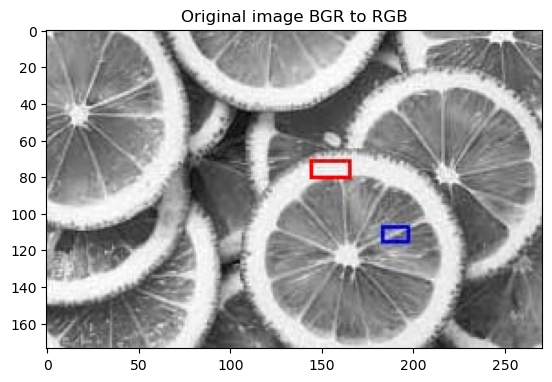

In [38]:
plt.imshow(image_rgb)
plt.title("Original image BGR to RGB")
plt.show()

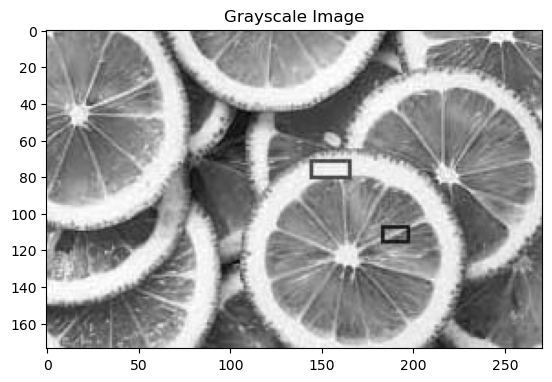

In [39]:
#Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

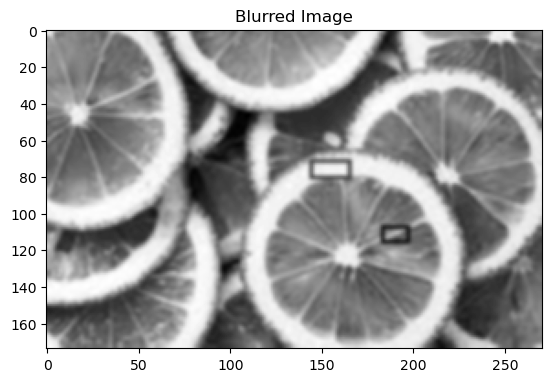

In [40]:
#Apply a Gaussian blur to the grayscale image
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.show()

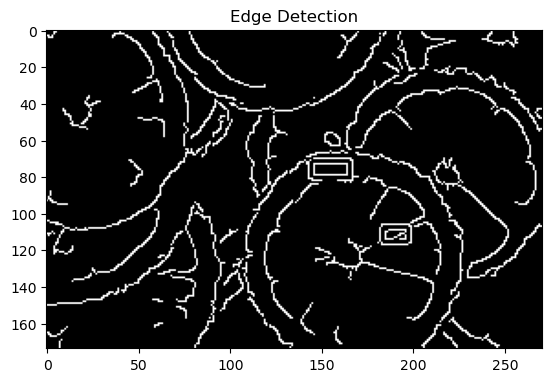

In [47]:
# Perform edge detection using the Canny edge detector
edges = cv2.Canny(blurred_image, 170, 250)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

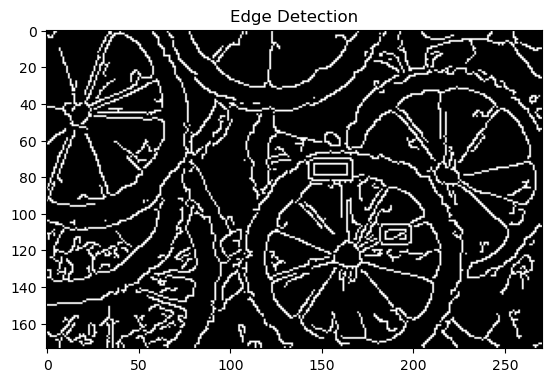

In [43]:
# Perform edge detection using the Canny edge detector
edges = cv2.Canny(blurred_image, 50, 150)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

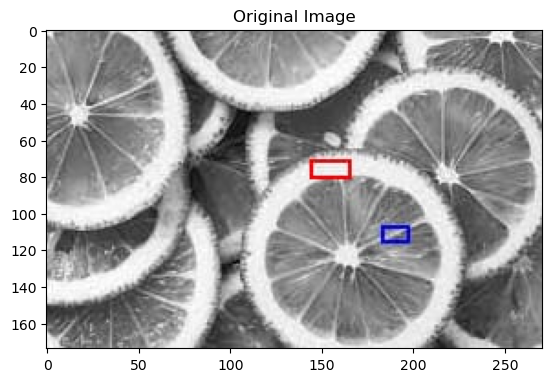

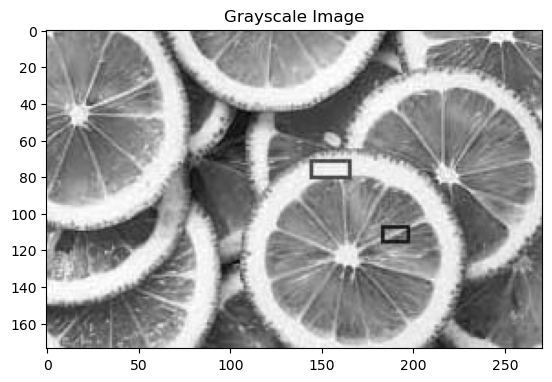

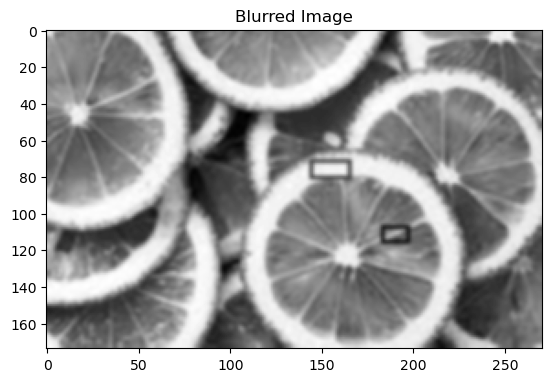

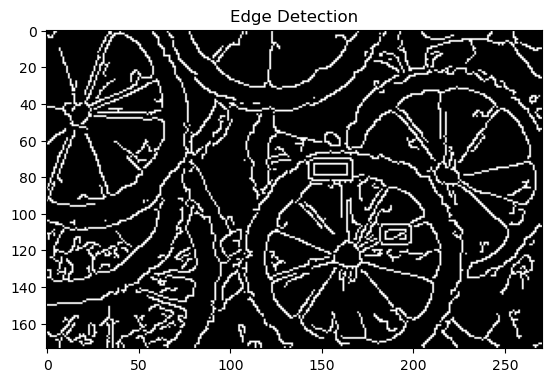

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file

original_image = cv2.imread(image_path)

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Always blur the grayscale image before edge detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.show()

# Perform edge detection using the Canny edge detector
edges = cv2.Canny(blurred_image, 50, 150)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image_path = 'path/to/your/image.jpg'
original_image = cv2.imread(image_path)

# Convert image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Denoise the image
denoised_image = cv2.fastNlMeansDenoising(gray_image, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Apply Canny edge detection
edges = cv2.Canny(denoised_image, 50, 150)

# Find contours in the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask
mask = np.zeros_like(gray_image)

# Draw contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Apply color conversion based on the mask
result = cv2.applyColorMap(original_image, cv2.COLORMAP_JET)
result = cv2.bitwise_and(result, result, mask=mask)

# Display the images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(231), plt.imshow(original_image[:, :, ::-1]), plt.title('Original Image')
plt.subplot(232), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(233), plt.imshow(denoised_image, cmap='gray'), plt.title('Denoised Image')
plt.subplot(234), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(235), plt.imshow(mask, cmap='gray'), plt.title('Contour Mask')
plt.subplot(236), plt.imshow(result[:, :, ::-1]), plt.title('Result')

plt.tight_layout()
plt.show()
